# MNIST

In [2]:
# import dataset
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [4]:
# unpack the data
X, y = mnist["data"], mnist["target"]
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (70000, 784)
y shape: (70000,)


In [5]:
# what a sample looks like
X.loc[0,:]

pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
           ... 
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
pixel784    0.0
Name: 0, Length: 784, dtype: float64

(-0.5, 27.5, 27.5, -0.5)

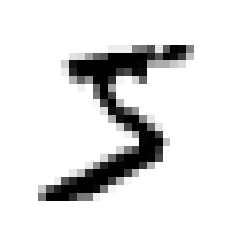

In [27]:
# plot a sample
import matplotlib as mpl
import matplotlib.pyplot as plt
example = X.loc[0,:].values
example_image = example.reshape(28,28)
plt.imshow(example_image, cmap="binary")
plt.axis("off")

In [7]:
# label
y[0]
# it's a string, so cast it as integer
y = y.astype(int)

In [8]:
# train-test split
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
# ONE VS ALL: label = 5
# train a classifier able to detect whether the images shows a 5
# create dataset with True/False labels (for 5/not-5 samples)
y_train_5 = y_train == 5
y_test_5 = y_test == 5

# train the classifier (use Stochastic Gradient Descent classifier)
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [26]:
# predict
sgd_clf.predict([example])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([ True])

In [11]:
# model evaluation
# at first, use cross validation with 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [12]:
# for skewed classes it's better to use the confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [30]:
# compute precision and recall
from sklearn.metrics import precision_score, recall_score
print("Precision score:", precision_score(y_train_5, y_train_pred))
print("Precision score:", recall_score(y_train_5, y_train_pred))

# compute F1 score
from sklearn.metrics import f1_score
print("F1 score:", f1_score(y_train_5, y_train_pred))

Precision score: 0.8370879772350012
Precision score: 0.6511713705958311
F1 score: 0.7325171197343846


In [31]:
# multiclass classifier
sgd_clf_all = SGDClassifier(random_state=42)
sgd_clf_all.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [43]:
sgd_clf_all.predict([X.loc[14]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1])

In [44]:
y_train[14]

1